**Load Data**

In [3]:
import pandas as pd # Changed pandas to pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# **Data Cleaning**

In [4]:
print(df.head())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [5]:
# Group columns
campaign_type_cols = [col for col in df.columns if 'Campaign_Type_' in col]

# Print grouped columns
print(f"Campaign Type Columns: {campaign_type_cols}")

Campaign Type Columns: []


In [6]:
#Inspect the data types of each column
print(df.dtypes)

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object


In [7]:
# View summary statistics
print(df.describe())

         Campaign_ID  Conversion_Rate            ROI         Clicks  \
count  200000.000000    200000.000000  200000.000000  200000.000000   
mean   100000.500000         0.080070       5.002438     549.772030   
std     57735.171256         0.040602       1.734488     260.019056   
min         1.000000         0.010000       2.000000     100.000000   
25%     50000.750000         0.050000       3.500000     325.000000   
50%    100000.500000         0.080000       5.010000     550.000000   
75%    150000.250000         0.120000       6.510000     775.000000   
max    200000.000000         0.150000       8.000000    1000.000000   

         Impressions  Engagement_Score  
count  200000.000000     200000.000000  
mean     5507.301520          5.494710  
std      2596.864286          2.872581  
min      1000.000000          1.000000  
25%      3266.000000          3.000000  
50%      5517.500000          5.000000  
75%      7753.000000          8.000000  
max     10000.000000         10.

In [8]:
# Numerical columns to check for outliers
numerical_cols = ['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [9]:
print(df.describe())

         Campaign_ID  Conversion_Rate            ROI         Clicks  \
count  200000.000000    200000.000000  200000.000000  200000.000000   
mean   100000.500000         0.080070       5.002438     549.772030   
std     57735.171256         0.040602       1.734488     260.019056   
min         1.000000         0.010000       2.000000     100.000000   
25%     50000.750000         0.050000       3.500000     325.000000   
50%    100000.500000         0.080000       5.010000     550.000000   
75%    150000.250000         0.120000       6.510000     775.000000   
max    200000.000000         0.150000       8.000000    1000.000000   

         Impressions  Engagement_Score  
count  200000.000000     200000.000000  
mean     5507.301520          5.494710  
std      2596.864286          2.872581  
min      1000.000000          1.000000  
25%      3266.000000          3.000000  
50%      5517.500000          5.000000  
75%      7753.000000          8.000000  
max     10000.000000         10.

In [10]:
print(df.isnull().sum())

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


In [11]:
print(df.duplicated().sum())

0


# **Exploritory Data Analysis & VIsualization**

In [12]:
# Get each unique column
print(df.columns)

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')


In [13]:
# Get unique campaign types
campaign_types = df['Campaign_Type'].unique()

# Print the list of campaign types
print(campaign_types)

['Email' 'Influencer' 'Display' 'Search' 'Social Media']


In [14]:
# Get each unique Location
print(df['Location'].unique())

['Chicago' 'New York' 'Los Angeles' 'Miami' 'Houston']


In [15]:
# Get each unique Target Audience
print(df.Target_Audience.value_counts())

Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64


Question at hand = Which location has the highest average amount of clicks, conversion Rate,and ROI for each age group? Does the location have a large impact on clicks, conversions and ROI?

In [16]:
# Group data by Target_Audience and Location, and calculate the mean of Clicks, Conversion_Rate, and ROI for each group
df_grouped = df.groupby(['Target_Audience', 'Location']).agg({'Clicks': 'mean', 'Conversion_Rate': 'mean', 'ROI': 'mean'})

In [17]:
print(df_grouped)

                                 Clicks  Conversion_Rate       ROI
Target_Audience Location                                          
All Ages        Chicago      547.501244         0.080183  5.036322
                Houston      548.526276         0.079676  4.995833
                Los Angeles  551.860497         0.080077  5.009486
                Miami        545.093434         0.080186  5.007513
                New York     551.470403         0.079746  4.976269
Men 18-24       Chicago      550.473523         0.080440  4.981673
                Houston      546.990705         0.079593  5.012825
                Los Angeles  550.282724         0.079850  4.999139
                Miami        549.152019         0.080685  4.972599
                New York     547.442603         0.080616  4.948964
Men 25-34       Chicago      546.334422         0.080225  5.010915
                Houston      548.983179         0.080215  4.998807
                Los Angeles  549.783811         0.079933  5.02

Visualize the findings

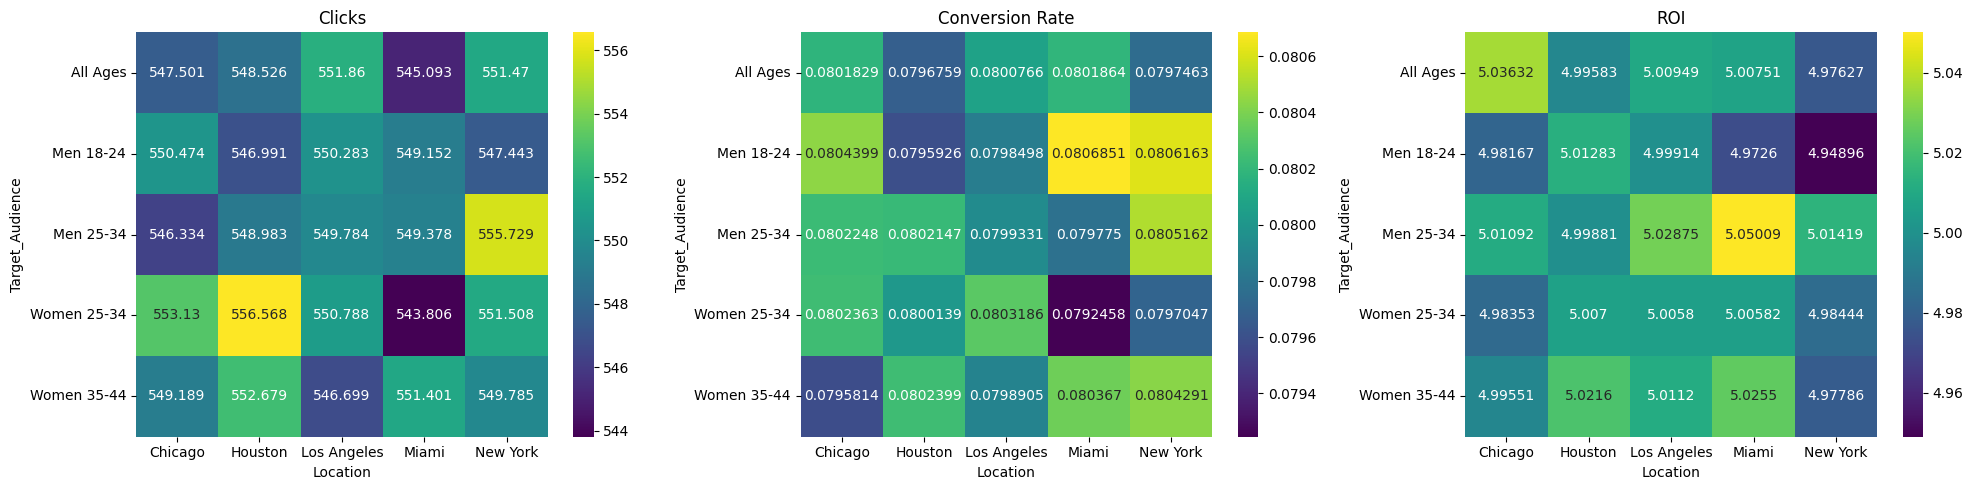

In [18]:
# Calculate the mean metrics for each location and target audience
df_grouped = df.groupby(['Location', 'Target_Audience'])[['Clicks', 'Conversion_Rate', 'ROI']].mean().reset_index()

# Pivot the table to have locations as columns and target audiences as rows
df_pivot_clicks = df_grouped.pivot(index='Target_Audience', columns='Location', values='Clicks')
df_pivot_conv = df_grouped.pivot(index='Target_Audience', columns='Location', values='Conversion_Rate')
df_pivot_roi = df_grouped.pivot(index='Target_Audience', columns='Location', values='ROI')

# Create a heatmap for each metric
metrics = ['Clicks', 'Conversion_Rate', 'ROI']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Create heatmaps
sns.heatmap(df_pivot_clicks, annot=True, cmap='viridis', ax=axes[0], fmt='g')
axes[0].set_title('Clicks')

sns.heatmap(df_pivot_conv, annot=True, cmap='viridis', ax=axes[1], fmt='g')
axes[1].set_title('Conversion Rate')

sns.heatmap(df_pivot_roi, annot=True, cmap='viridis', ax=axes[2], fmt='g')
axes[2].set_title('ROI')

plt.tight_layout()
plt.show()

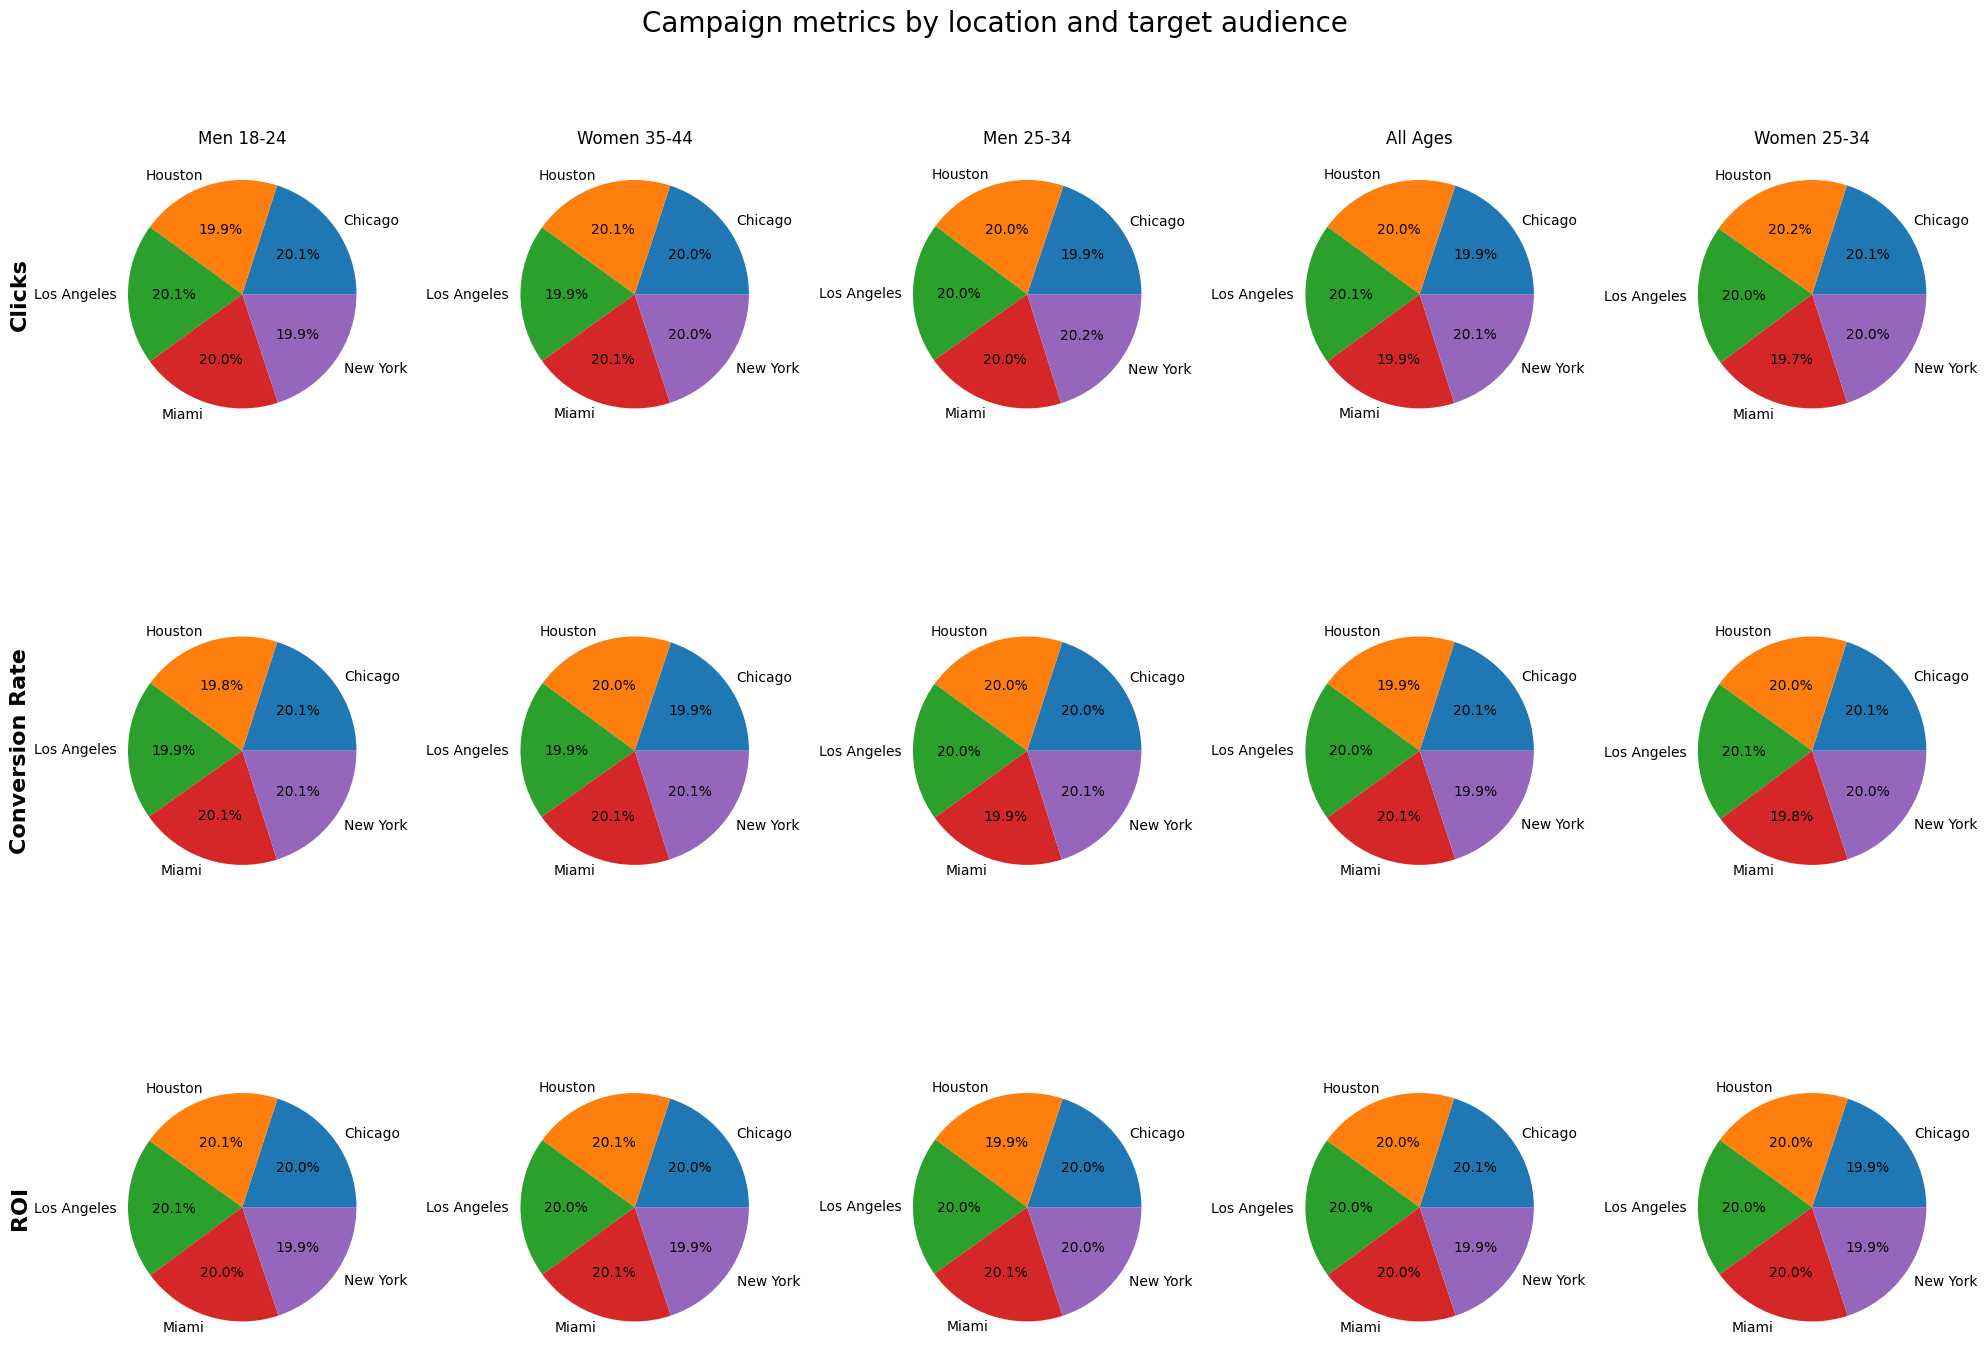

In [19]:
# Calculate the mean metrics for each location and target audience
df_grouped = df.groupby(['Location', 'Target_Audience'])[['Clicks', 'Conversion_Rate', 'ROI']].mean().reset_index()

# Create a figure and axes for the pie charts
fig, axes = plt.subplots(3, len(df['Target_Audience'].unique()), figsize=(20, 15))

# Set title for the figure
fig.suptitle('Campaign metrics by location and target audience', fontsize=20)

# Iterate over each target audience and create pie charts
for i, audience in enumerate(df['Target_Audience'].unique()):
    df_audience = df_grouped[df_grouped['Target_Audience'] == audience]

    # Clicks pie chart
    axes[0, i].pie(df_audience['Clicks'], labels=df_audience['Location'], autopct='%1.1f%%')
    axes[0, i].set_title(f'{audience}')

    # Conversion Rate pie chart
    axes[1, i].pie(df_audience['Conversion_Rate'], labels=df_audience['Location'], autopct='%1.1f%%')

    # ROI pie chart
    axes[2, i].pie(df_audience['ROI'], labels=df_audience['Location'], autopct='%1.1f%%')

# Set labels for each row
axes[0, 0].set_ylabel('Clicks', fontsize=16, fontweight='bold', labelpad=50)
axes[1, 0].set_ylabel('Conversion Rate', fontsize=16, fontweight='bold', labelpad=50)
axes[2, 0].set_ylabel('ROI', fontsize=16, fontweight='bold', labelpad=50)

plt.tight_layout()
plt.show()

Analysis- The Pie Charts shows that in terms of average amount of clicks, ROI, and conversion rate for each target audience, Location has little to no impact on the results. There are minimum differences between each location. This tells me that I can drop the location column.

Question at Hand = What Target audience yields the highest combination of ROI and Conversion Rate and Clicks?

In [20]:
# This code analyzes campaign performance for different target audiences.
# It calculates an average score based on standardized metrics (Conversion Rate, ROI, and Clicks)
# and identifies the target audience with the best overall performance.


# Filter for selected target audiences
target_audiences = ['All Ages', 'Men 18-24', 'Men 25-34', 'Women 25-34', 'Women 35-44']
df_filtered = df[df['Target_Audience'].isin(target_audiences)]

# Calculate mean metrics by target audience
df_grouped = df_filtered.groupby(['Target_Audience'])[['Conversion_Rate', 'ROI', 'Clicks']].mean()

# Standardize the metrics (z-score)
df_std = (df_grouped - df_grouped.mean()) / df_grouped.std()

# Calculate the average score across standardized metrics
df_std['Average_Score'] = df_std.mean(axis=1)

# Find the target audience with the highest average score
best_audience = df_std['Average_Score'].idxmax()

print(f"The target audience with the best combined score is: {best_audience}")

The target audience with the best combined score is: Men 25-34


Question at Hand = What campaign type yields the higest number of clicks, Conversion rate and ROI?

In [21]:
# This code analyzes campaign performance for different campaign types.
# It calculates an average score based on standardized metrics (Conversion Rate, ROI, and Clicks)
# and identifies the campaign type with the best overall performance.


# Calculate mean metrics by campaign type
df_grouped = df.groupby(['Campaign_Type'])[['Conversion_Rate', 'ROI', 'Clicks']].mean()

# Standardize the metrics (z-score)
df_std = (df_grouped - df_grouped.mean()) / df_grouped.std()

# Calculate the average score across standardized metrics
df_std['Average_Score'] = df_std.mean(axis=1)

# Sort by average score and get the top 3 campaign types
top_3_campaign_types = df_std.sort_values(by='Average_Score', ascending=False).head(3).index.tolist()

print(f"The top 3 campaign types with the best combined score are: {top_3_campaign_types}")

The top 3 campaign types with the best combined score are: ['Display', 'Influencer', 'Social Media']


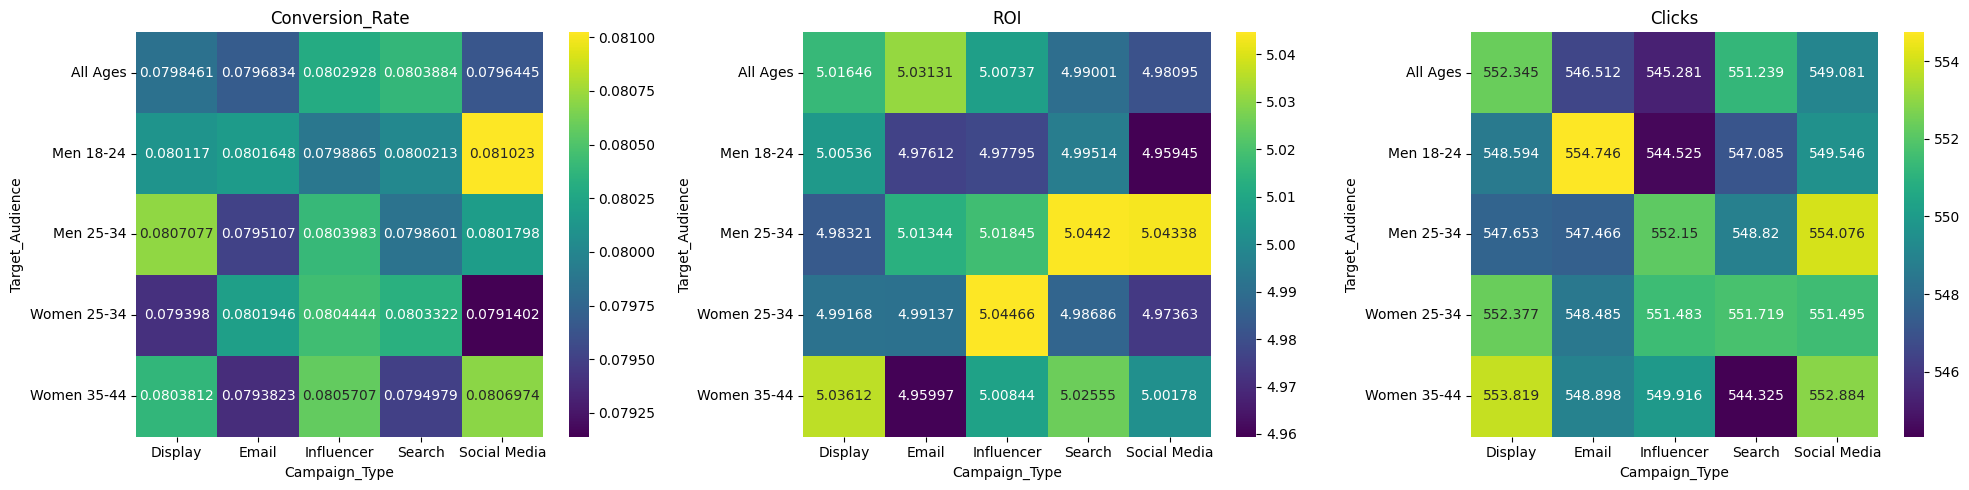

In [22]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# Calculate the mean metrics for each campaign type and target audience
df_grouped = df.groupby(['Campaign_Type', 'Target_Audience'])[['Conversion_Rate', 'ROI', 'Clicks']].mean().reset_index()

# Pivot the table to have campaign types as columns and target audiences as rows
df_pivot = df_grouped.pivot(index='Target_Audience', columns='Campaign_Type', values=['Conversion_Rate', 'ROI', 'Clicks'])

# Create a heatmap for each metric
metrics = ['Conversion_Rate', 'ROI', 'Clicks']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, metric in enumerate(metrics):
    sns.heatmap(df_pivot[metric], annot=True, cmap='viridis', ax=axes[i], fmt='g')
    axes[i].set_title(f'{metric}')

plt.tight_layout()
plt.show()

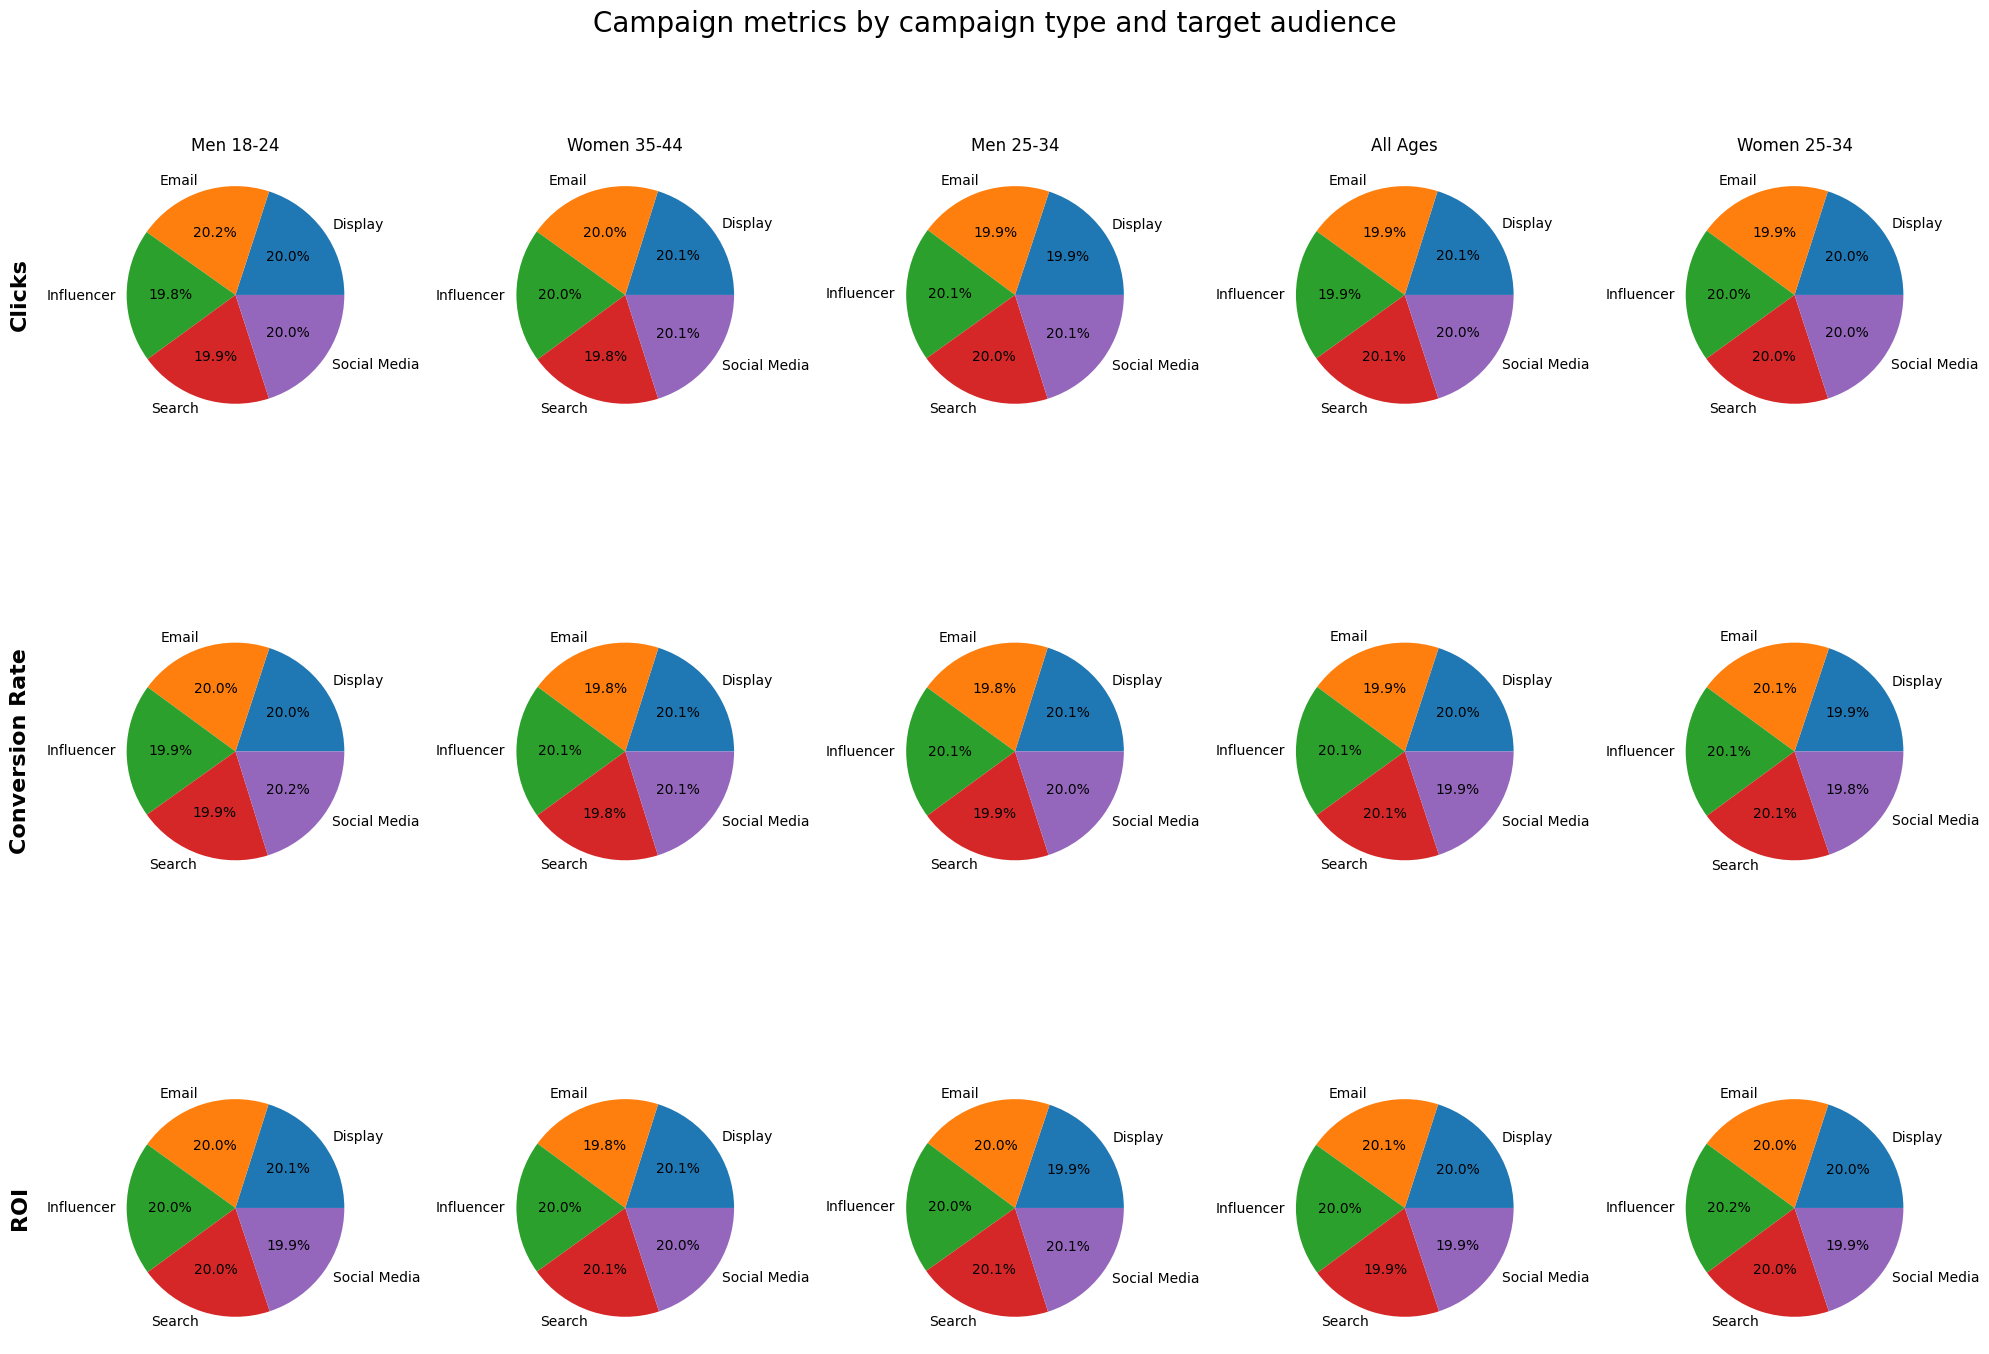

In [23]:
# Calculate the mean metrics for each campaign type and target audience
df_grouped = df.groupby(['Campaign_Type', 'Target_Audience'])[['Clicks', 'Conversion_Rate', 'ROI']].mean().reset_index()

# Create a figure and axes for the pie charts
fig, axes = plt.subplots(3, len(df['Target_Audience'].unique()), figsize=(20, 15))

# Set title for the figure
fig.suptitle('Campaign metrics by campaign type and target audience', fontsize=20)

# Iterate over each target audience and create pie charts
for i, audience in enumerate(df['Target_Audience'].unique()):
    df_audience = df_grouped[df_grouped['Target_Audience'] == audience]

    # Clicks pie chart
    axes[0, i].pie(df_audience['Clicks'], labels=df_audience['Campaign_Type'], autopct='%1.1f%%')
    axes[0, i].set_title(f'{audience}')

    # Conversion Rate pie chart
    axes[1, i].pie(df_audience['Conversion_Rate'], labels=df_audience['Campaign_Type'], autopct='%1.1f%%')

    # ROI pie chart
    axes[2, i].pie(df_audience['ROI'], labels=df_audience['Campaign_Type'], autopct='%1.1f%%')

# Set labels for each row
axes[0, 0].set_ylabel('Clicks', fontsize=16, fontweight='bold', labelpad=50)
axes[1, 0].set_ylabel('Conversion Rate', fontsize=16, fontweight='bold', labelpad=50)
axes[2, 0].set_ylabel('ROI', fontsize=16, fontweight='bold', labelpad=50)

plt.tight_layout()
plt.show()

There's minimum differences between each campaign type and it's affect on the ROI, Conversion Rate, or Clicks. According to each Target audience.

Question at hand = Which  pairs of Numerical columns have the most correlation with each other?

In [24]:
# Calculate the correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr().abs()

# Remove diagonal part
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Find the columns with the highest correlation values
top_7_corr = corr_matrix.unstack().sort_values(ascending=False).head(7)

print(f"The top 7 most correlated columns are:\n{top_7_corr}")

The top 7 most correlated columns are:
Engagement_Score  Impressions         0.003030
Impressions       Engagement_Score    0.003030
Conversion_Rate   Impressions         0.002834
Impressions       Conversion_Rate     0.002834
Clicks            Campaign_ID         0.002266
Campaign_ID       Clicks              0.002266
Impressions       ROI                 0.002257
dtype: float64


The Top 3 of Numerical categories with the most correlation to each other are impressions, engagement score & conversion rate.

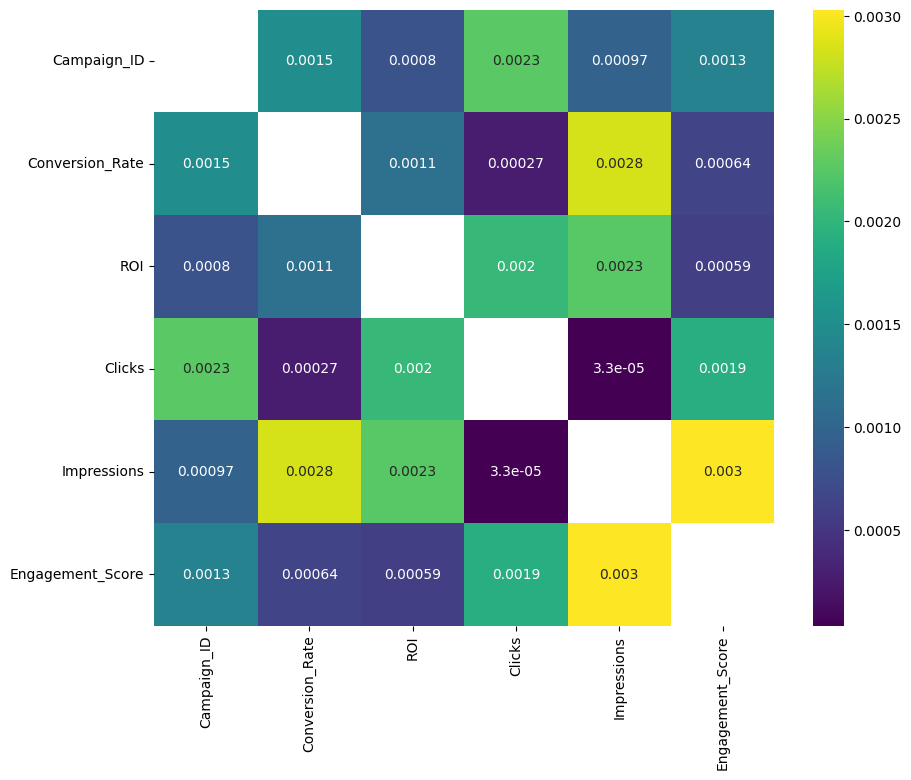

In [25]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr().abs()

# Remove diagonal part
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

Questions at Hand = Which campaign type has the higest correlation with for these individual columns (Engagement Score, Impressions, and conversion rate)?

In [26]:
# One-hot encode 'Campaign_Type'
df = pd.get_dummies(df, columns=['Campaign_Type'])

# Select relevant columns for correlation analysis
selected_columns = [col for col in df.columns if 'Campaign_Type_' in col or col in ['Engagement_Score', 'Impressions', 'Conversion_Rate']]
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Get correlations for 'Engagement_Score', 'Impressions', and 'Conversion_Rate' with campaign types
correlations = corr_matrix[['Engagement_Score', 'Impressions', 'Conversion_Rate']].loc[[col for col in df_selected.columns if 'Campaign_Type_' in col]]

# Find the campaign type with the highest correlation for each numerical column
best_correlations = correlations.idxmax()

print(f"Campaign type with the highest correlation with Engagement_Score: {best_correlations['Engagement_Score']}")
print(f"Campaign type with the highest correlation with Impressions: {best_correlations['Impressions']}")
print(f"Campaign type with the highest correlation with Conversion_Rate: {best_correlations['Conversion_Rate']}")

Campaign type with the highest correlation with Engagement_Score: Campaign_Type_Display
Campaign type with the highest correlation with Impressions: Campaign_Type_Email
Campaign type with the highest correlation with Conversion_Rate: Campaign_Type_Influencer


In [27]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# One-hot encode 'Campaign_Type'
df = pd.get_dummies(df, columns=['Campaign_Type'])

# Select relevant columns for correlation analysis
selected_columns = [col for col in df.columns if 'Campaign_Type_' in col or col in ['Engagement_Score', 'Impressions', 'Conversion_Rate']]
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Get correlations for 'Engagement_Score', 'Impressions', and 'Conversion_Rate' with campaign types
correlations = corr_matrix[['Engagement_Score', 'Impressions', 'Conversion_Rate']].loc[[col for col in df_selected.columns if 'Campaign_Type_' in col]]

# Find the campaign type with the highest correlation for each numerical column
best_correlations = correlations.idxmax()

# Print the highest correlations as percentages
print(f"Campaign type with the highest correlation with Engagement_Score: {best_correlations['Engagement_Score']} ({correlations.loc[best_correlations['Engagement_Score'], 'Engagement_Score']:.2%})")
print(f"Campaign type with the highest correlation with Impressions: {best_correlations['Impressions']} ({correlations.loc[best_correlations['Impressions'], 'Impressions']:.2%})")
print(f"Campaign type with the highest correlation with Conversion_Rate: {best_correlations['Conversion_Rate']} ({correlations.loc[best_correlations['Conversion_Rate'], 'Conversion_Rate']:.2%})")

Campaign type with the highest correlation with Engagement_Score: Campaign_Type_Display (0.19%)
Campaign type with the highest correlation with Impressions: Campaign_Type_Email (0.27%)
Campaign type with the highest correlation with Conversion_Rate: Campaign_Type_Influencer (0.30%)


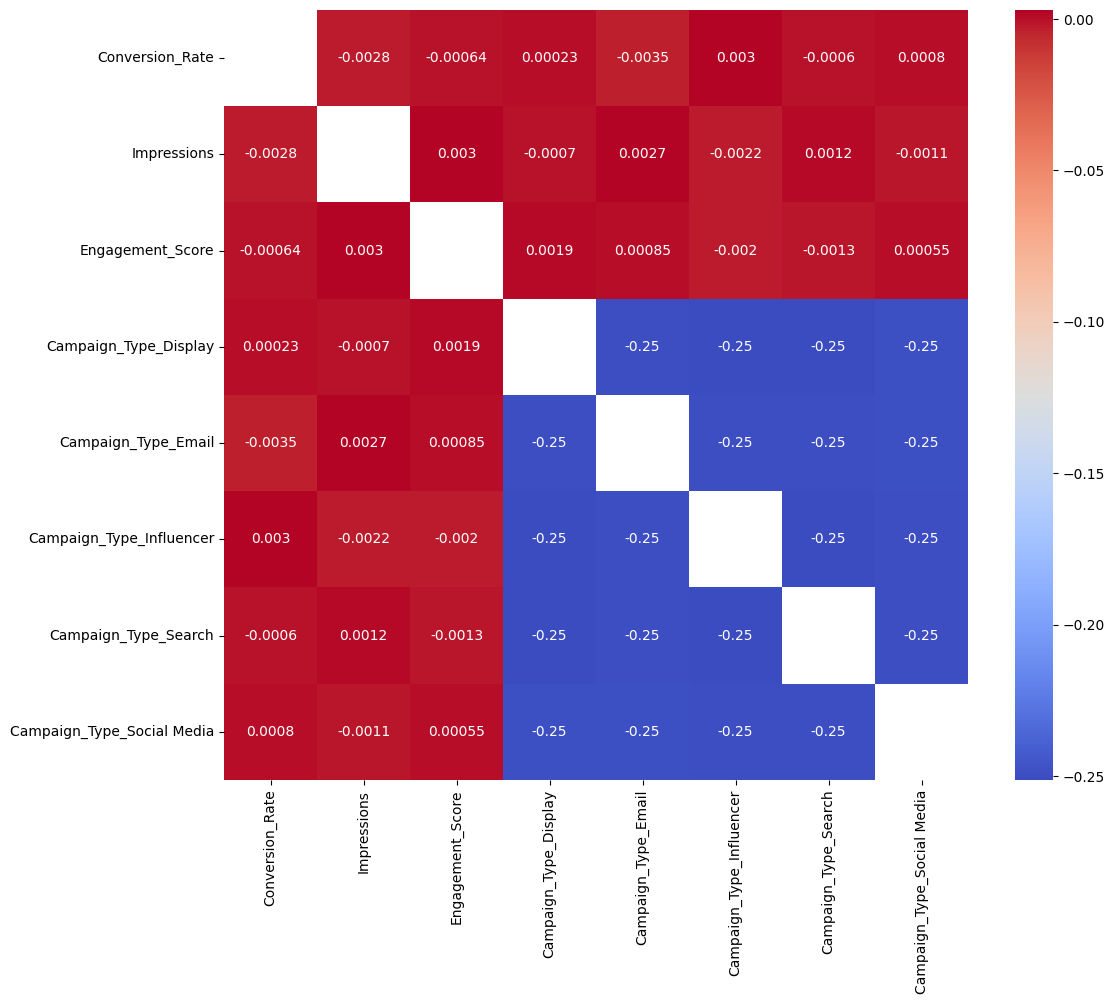

In [28]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# One-hot encode 'Campaign_Type'
df = pd.get_dummies(df, columns=['Campaign_Type'])

# Select relevant columns for correlation analysis
selected_columns = [col for col in df.columns if 'Campaign_Type_' in col or col in ['Engagement_Score', 'Impressions', 'Conversion_Rate']]
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Remove diagonal part
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Plot the heatmap with a more colorful cmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Question at hand = Which Target audience has the most Correlations with these 3 seperate columns (Conversion Rate, Impressions, Engagement Score)

In [29]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# One-hot encode 'Target_Audience'
df = pd.get_dummies(df, columns=['Target_Audience'])

# Select relevant columns for correlation analysis
selected_columns = [col for col in df.columns if 'Target_Audience_' in col or col in ['Impressions', 'Engagement_Score', 'Conversion_Rate']]
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Get correlations for 'Engagement_Score', 'Impressions', and 'Conversion_Rate' with target audiences
correlations = corr_matrix[['Engagement_Score', 'Impressions', 'Conversion_Rate']].loc[[col for col in df_selected.columns if 'Target_Audience_' in col]]

# Find the target audience with the highest correlation for each numerical column
best_correlations = correlations.idxmax()

# Print the target audiences with the highest correlations
print(f"Target audience with the highest correlation with Engagement_Score: {best_correlations['Engagement_Score']}")
print(f"Target audience with the highest correlation with Impressions: {best_correlations['Impressions']}")
print(f"Target audience with the highest correlation with Conversion_Rate: {best_correlations['Conversion_Rate']}")

Target audience with the highest correlation with Engagement_Score: Target_Audience_Men 18-24
Target audience with the highest correlation with Impressions: Target_Audience_Women 35-44
Target audience with the highest correlation with Conversion_Rate: Target_Audience_Men 18-24


In [30]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# One-hot encode 'Target_Audience'
df = pd.get_dummies(df, columns=['Target_Audience'])

# Select relevant columns for correlation analysis
selected_columns = [col for col in df.columns if 'Target_Audience_' in col or col in ['Impressions', 'Engagement_Score', 'Conversion_Rate']]
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Get correlations for 'Engagement_Score', 'Impressions', and 'Conversion_Rate' with target audiences
correlations = corr_matrix[['Engagement_Score', 'Impressions', 'Conversion_Rate']].loc[[col for col in df_selected.columns if 'Target_Audience_' in col]]

# Find the target audience with the highest correlation for each numerical column
best_correlations = correlations.idxmax()

# Print the highest correlations as percentages
print(f"Target audience with the highest correlation with Engagement_Score: {best_correlations['Engagement_Score']} ({correlations.loc[best_correlations['Engagement_Score'], 'Engagement_Score']:.2%})")
print(f"Target audience with the highest correlation with Impressions: {best_correlations['Impressions']} ({correlations.loc[best_correlations['Impressions'], 'Impressions']:.2%})")
print(f"Target audience with the highest correlation with Conversion_Rate: {best_correlations['Conversion_Rate']} ({correlations.loc[best_correlations['Conversion_Rate'], 'Conversion_Rate']:.2%})")

Target audience with the highest correlation with Engagement_Score: Target_Audience_Men 18-24 (0.36%)
Target audience with the highest correlation with Impressions: Target_Audience_Women 35-44 (0.23%)
Target audience with the highest correlation with Conversion_Rate: Target_Audience_Men 18-24 (0.21%)


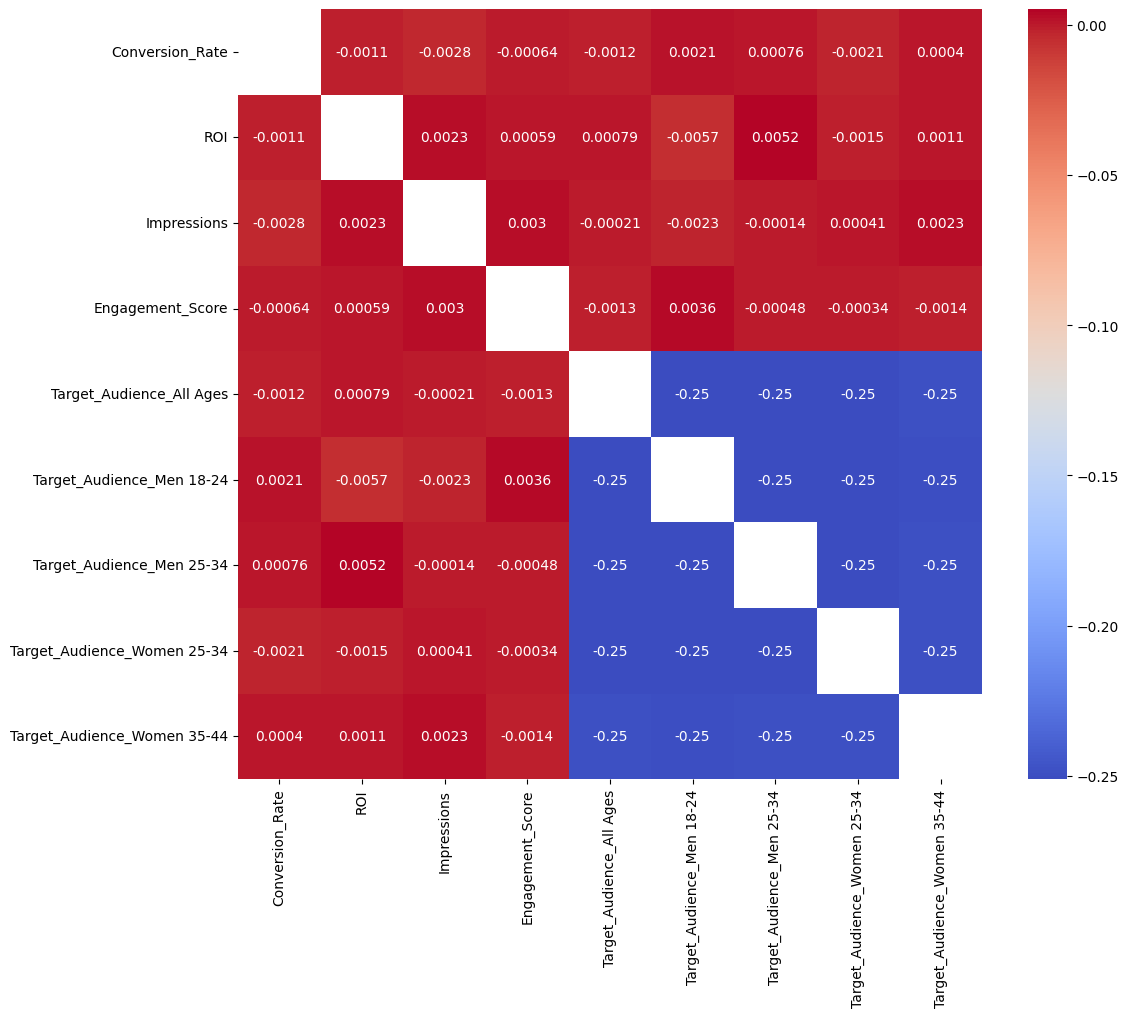

In [31]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# One-hot encode 'Target_Audience'
df = pd.get_dummies(df, columns=['Target_Audience'])

# Select relevant columns for correlation analysis
selected_columns = [col for col in df.columns if 'Target_Audience_' in col or col in ['Impressions', 'Engagement_Score', 'Conversion_Rate', 'ROI']]
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Remove diagonal part
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Machine Learning**

Can I use Machine Learning to accurately predict the success of a marketing campaign (judged by the Conversion rate) by using the Categorical data columns (Campaign type, Channel Used,) and the numerical columns (Impressions, Engagement Score)?

In [32]:
# Calculate the range for each column
def range_fn(x):
  return f"{x.min()}-{x.max()}"

print(df[['Impressions', 'Engagement_Score', 'Conversion_Rate']].apply(range_fn))

Impressions         1000-10000
Engagement_Score          1-10
Conversion_Rate      0.01-0.15
dtype: object


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Campaign_Type', 'Channel_Used',
                                 'Target_Audience'])

# Select features and target variable
features = ['Impressions', 'Engagement_Score']
target = 'Conversion_Rate'

# Create interaction term
df['Impressions*Engagement_Score'] = df['Impressions'] * df['Engagement_Score']
features.append('Impressions*Engagement_Score')

# Calculate the mean for each numerical feature
for feature in features:
    mean = df[feature].mean()

    # Replace outliers with the mean
    std = df[feature].std()
    df[feature] = np.where(np.abs(df[feature] - mean) > 3 * std, mean, df[feature])

    # Fill missing values with the mean
    df[feature] = df[feature].fillna(mean)

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Calculate the range for impressions, engagement score, and conversion rate
def range_fn(x):
  return f"{x.min()}-{x.max()}"

Mean Squared Error: 0.0016437449156485346
R-squared: 3.848793894645208e-05


# **Back End Market Tool (Product)**

Product 1 allows you to Choose a target audience and get recommended a location, and campaign type, and channel to use. It also gives you the estimated ROI, Engagement Score, and Impressions, and Conversion Rate.

Product 2 Does the same as product one as well as allow you to compare the recommendations of 2 target audiences.

In [34]:
# Load the dataframe
df = pd.read_csv('marketing_campaign_dataset.csv')

def recommend_strategy(target_audience, goal="generate most ROI"):
  """
  Recommends the most impactful marketing strategy based on target audience and goal.
  Includes estimated Engagement_Score, Impressions, Conversion_Rate, and ROI.

  Args:
    target_audience: The target audience for the marketing campaign.
    goal: The goal of the marketing campaign (currently only supports "generate most ROI").

  Returns:
    A pandas DataFrame containing the recommended Campaign_Type, Location, and Channel_Used combination,
    along with estimated Engagement_Score, Impressions, Conversion_Rate, and ROI.
  """

  if goal == "generate most ROI":
    # Filter the DataFrame based on the target audience
    df_filtered = df[df['Target_Audience'] == target_audience]

    # Calculate the average ROI for each combination of Campaign_Type, Location, and Channel_Used
    roi_by_strategy = df_filtered.groupby(['Campaign_Type', 'Location', 'Channel_Used'])['ROI'].mean()

    # Find the combination with the highest average ROI
    recommended_strategy = roi_by_strategy.idxmax()

    # Get the estimated metrics including ROI
    estimated_metrics = df_filtered[
        (df_filtered['Campaign_Type'] == recommended_strategy[0]) &
        (df_filtered['Location'] == recommended_strategy[1]) &
        (df_filtered['Channel_Used'] == recommended_strategy[2])
    ][['Engagement_Score', 'Impressions', 'Conversion_Rate', 'ROI']].mean()

    # Create a DataFrame for the recommendation and estimated metrics
    recommendation_df = pd.DataFrame({
        'Campaign_Type': [recommended_strategy[0]],
        'Location': [recommended_strategy[1]],
        'Channel_Used': [recommended_strategy[2]],
        'Estimated_Engagement_Score': [estimated_metrics['Engagement_Score']],
        'Estimated_Impressions': [estimated_metrics['Impressions']],
        'Estimated_Conversion_Rate': [estimated_metrics['Conversion_Rate']],
        'Estimated_ROI': [estimated_metrics['ROI']]
    })

    return recommendation_df

  else:
    return "Goal not supported. Currently only supports 'generate most ROI'."

# Get target audience from the user
target_audience = input("Enter target audience: ")

# Get the recommended strategy
recommendation = recommend_strategy(target_audience)

# Print the recommendation
print(recommendation)

Enter target audience: Men 18-24
  Campaign_Type     Location Channel_Used  Estimated_Engagement_Score  \
0         Email  Los Angeles   Google Ads                    5.769841   

   Estimated_Impressions  Estimated_Conversion_Rate  Estimated_ROI  
0            5738.436508                    0.08131       5.211429  


In [35]:
def compare_strategies(target_audience1, target_audience2, goal="generate most ROI"):
  """
  Compares the most impactful marketing strategies for two different target audiences
  based on the specified goal.

  Args:
    target_audience1: The first target audience.
    target_audience2: The second target audience.
    goal: The goal of the marketing campaign (currently only supports "generate most ROI").

  Returns:
    A pandas DataFrame containing the recommended strategies for each target audience and
    their estimated Engagement_Score, Impressions, Conversion_Rate, and ROI.
  """

  if goal == "generate most ROI":
    # Get recommendations for each target audience
    recommendation1 = recommend_strategy(target_audience1, goal)
    recommendation2 = recommend_strategy(target_audience2, goal)

    # Add target audience column to each recommendation
    recommendation1['Target_Audience'] = target_audience1
    recommendation2['Target_Audience'] = target_audience2

    # Concatenate the recommendations into a single DataFrame
    comparison_df = pd.concat([recommendation1, recommendation2])

    return comparison_df

  else:
    return "Goal not supported. Currently only supports 'generate most ROI'."

def recommend_strategy(target_audience, goal="generate most ROI"):
  """
  Recommends the most impactful marketing strategy based on target audience and goal.
  Includes estimated Engagement_Score, Impressions, Conversion_Rate, and ROI.

  Args:
    target_audience: The target audience for the marketing campaign.
    goal: The goal of the marketing campaign (currently only supports "generate most ROI").

  Returns:
    A pandas DataFrame containing the recommended Campaign_Type, Location, and Channel_Used combination,
    along with estimated Engagement_Score, Impressions, Conversion_Rate, and ROI.
  """

  if goal == "generate most ROI":
    # Filter the DataFrame based on the target audience
    df_filtered = df[df['Target_Audience'] == target_audience]

    # Calculate the average ROI for each combination of Campaign_Type, Location, and Channel_Used
    roi_by_strategy = df_filtered.groupby(['Campaign_Type', 'Location', 'Channel_Used'])['ROI'].mean()

    # Find the combination with the highest average ROI
    recommended_strategy = roi_by_strategy.idxmax()

    # Get the estimated metrics including ROI
    estimated_metrics = df_filtered[
        (df_filtered['Campaign_Type'] == recommended_strategy[0]) &
        (df_filtered['Location'] == recommended_strategy[1]) &
        (df_filtered['Channel_Used'] == recommended_strategy[2])
    ][['Engagement_Score', 'Impressions', 'Conversion_Rate', 'ROI']].mean()

    # Create a DataFrame for the recommendation and estimated metrics
    recommendation_df = pd.DataFrame({
        'Campaign_Type': [recommended_strategy[0]],
        'Location': [recommended_strategy[1]],
        'Channel_Used': [recommended_strategy[2]],
        'Estimated_Engagement_Score': [estimated_metrics['Engagement_Score']],
        'Estimated_Impressions': [estimated_metrics['Impressions']],
        'Estimated_Conversion_Rate': [estimated_metrics['Conversion_Rate']],
        'Estimated_ROI': [estimated_metrics['ROI']]
    })

    return recommendation_df

  else:
    return "Goal not supported. Currently only supports 'generate most ROI'."

# Get target audiences from the user
target_audience1 = input("Enter the first target audience: ")
target_audience2 = input("Enter the second target audience: ")

# Compare strategies
comparison = compare_strategies(target_audience1, target_audience2)

# Print the comparison
print(comparison)

Enter the first target audience: Men 18-24
Enter the second target audience: Men 25-34
  Campaign_Type     Location Channel_Used  Estimated_Engagement_Score  \
0         Email  Los Angeles   Google Ads                    5.769841   
0        Search  Los Angeles     Facebook                    5.720000   

   Estimated_Impressions  Estimated_Conversion_Rate  Estimated_ROI  \
0            5738.436508                    0.08131       5.211429   
0            5631.244000                    0.08188       5.340400   

  Target_Audience  
0       Men 18-24  
0       Men 25-34  
